In [3]:
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Define the folder where the subject-specific CSV files are stored
data_folder = r"W:\Projects\2019-04 M1M1PAS Project\analysis\source_Paolo\fc_source\BeamformeroldLFtest"

# Get a list of all the CSV files for the subjects
file_list = [f for f in os.listdir(data_folder)]

all_subjects_dfs = []
df_means = []

# Loop through each file and import the DataFrame
for file in file_list:
    
    # file = file_list[0]

    subject = file.split('_')[0].replace('sub-', '')
    task = file.split('_')[1].replace('task-', '')
    run = file.split('_')[2].replace('run-', '')

    file_path = os.path.join(data_folder, file)
    
    df = pd.read_csv(file_path,index_col=0)
    
    # Normalize phase lags to be between 0 and 2*pi
    phase_lag_normalized = df['phase_lag'] % (2 * np.pi)
    
    # Compute the circular mean
    circ_mean_plag = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
    
    df['subject'] = subject
    df['task'] = task
    df['run'] = run
    
    all_subjects_dfs.append(df)
    
    df_mean = {'subject_id': subject, 'task': task, 'run': run, 'mean_plag': circ_mean_plag}
    
    df_means.append(df_mean)
    
big_df = pd.concat(all_subjects_dfs, ignore_index=True)
all_mean_dfs = pd.DataFrame(df_means)

In [4]:
big_df[(big_df['subject'] == '7')]

,phase_lag,subject,task,run
494800,2.500125,7,negneg,1
494801,3.918069,7,negneg,1
494802,4.414129,7,negneg,1
494803,4.535405,7,negneg,1
494804,4.628446,7,negneg,1
...,...,...,...,...
533795,-6.617151,7,random,5
533796,-5.733978,7,random,5
533797,-5.058488,7,random,5
533798,-5.093968,7,random,5


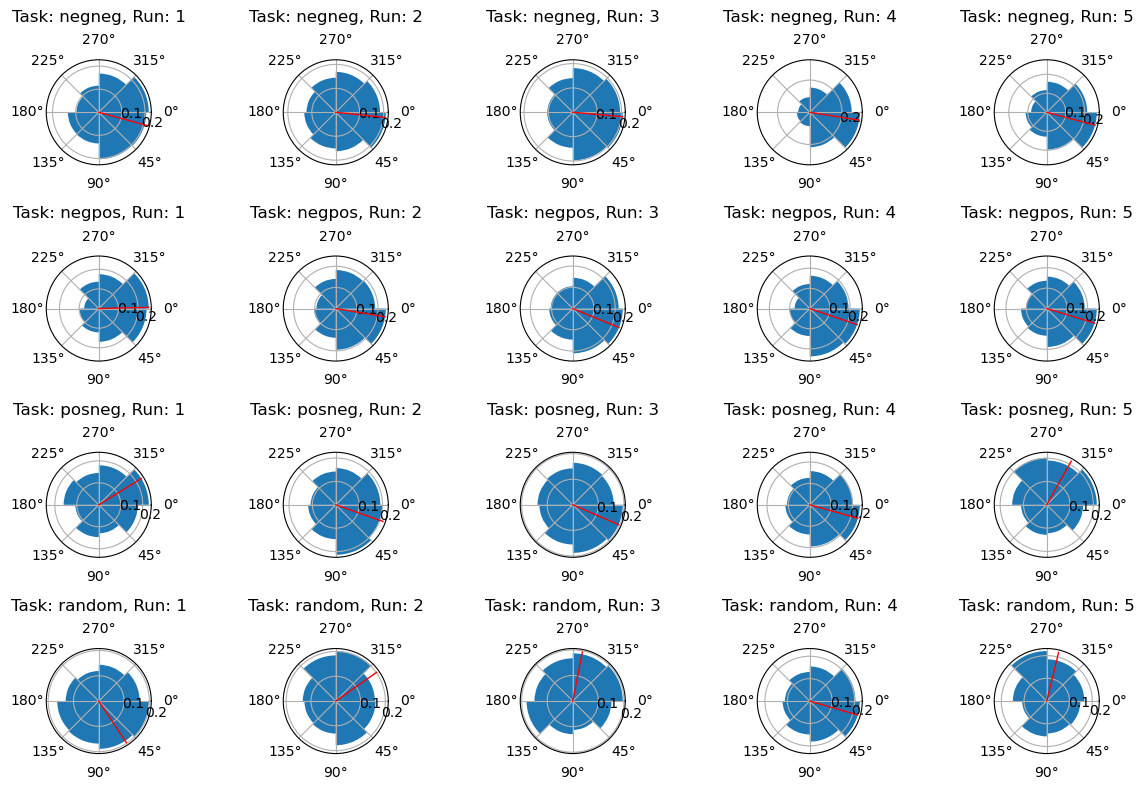

In [9]:
# Step 1: Set the number of bins
n_bins = 8

# Step 2: Get unique tasks and runs
tasks = big_df['task'].unique()
runs = big_df['run'].unique()

# Step 3: Create subplots: rows = tasks, columns = runs
fig, axes = plt.subplots(len(tasks), len(runs), subplot_kw={'polar': True}, figsize=(12, 8))

# Step 4: Iterate through each task and run combination
for i, task in enumerate(tasks):
    for j, run in enumerate(runs):
        
        # Filter the dataframe for the current task and run
        task_run_df = big_df[(big_df['subject'] == '5') & (big_df['task'] == task) & (big_df['run'] == run)]
        
        # Check if the filtered DataFrame is empty (i.e., no data for this combination)
        if task_run_df.empty:
            print(f"No data for task: {task}, run: {run}. Skipping.")
            continue  # Skip this iteration if no data is available

        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = task_run_df['phase_lag'] % (2 * np.pi)

        # Compute the histogram
        counts, bin_edges = np.histogram(phase_lag_normalized, bins=n_bins, range=(0, 2 * np.pi), density=True)
        
        # Convert bin edges to bin centers for polar plotting
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        width = bin_edges[1] - bin_edges[0]  # Calculate the width

        # Plot the histogram in the current subplot
        ax = axes[i][j]
        ax.bar(bin_centers, counts, width=width, align='center')

        # Set title and labels
        ax.set_title(f'Task: {task}, Run: {run}', va='bottom')
        ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
        ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise
        
        # Compute the circular mean
        circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)

        # Plot the median line
        ax.plot([circular_mean, circular_mean], [0, max(counts)], color='red', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Distribution of subject means for each condition and time and a mean across subjects

# Step 1: Set the number of bins
n_bins = 10

# Step 2: Get unique tasks and runs
tasks = all_mean_dfs['task'].unique()
runs = all_mean_dfs['run'].unique()

# Step 3: Create subplots: rows = tasks, columns = runs
fig, axes = plt.subplots(len(tasks), len(runs), subplot_kw={'polar': True}, figsize=(12, 8))

# Step 4: Iterate through each task and run combination
for i, task in enumerate(tasks):
    for j, run in enumerate(runs):
        
        
        # Filter the dataframe for the current task and run
        task_run_df = all_mean_dfs[(all_mean_dfs['task'] == task) & (all_mean_dfs['run'] == run)]
        
                # Check if the filtered DataFrame is empty (i.e., no data for this combination)
        if task_run_df.empty:
            print(f"No data for task: {task}, run: {run}. Skipping.")
            continue  # Skip this iteration if no data is available

        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = task_run_df['mean_plag'] % (2 * np.pi)

        # Compute the histogram
        counts, bin_edges = np.histogram(phase_lag_normalized, bins=n_bins, range=(0, 2 * np.pi), density=True)
        

        # Convert bin edges to bin centers for polar plotting
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        width = bin_edges[1] - bin_edges[0]  # Calculate the width

        # Plot the histogram in the current subplot
        ax = axes[i][j]
        ax.bar(bin_centers, counts, width=width, align='center')

        # Set title and labels
        ax.set_title(f'Task: {task}, Run: {run}', va='bottom')
        ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
        ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise
        
        # Compute the circular median
        #circular_median = calculate_circular_median(phase_lag_normalized)
        circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)

        # Plot the median line
        ax.plot([circular_mean, circular_mean], [0, max(counts)], color='red', linewidth=1)


# Adjust layout
plt.tight_layout()
plt.show()

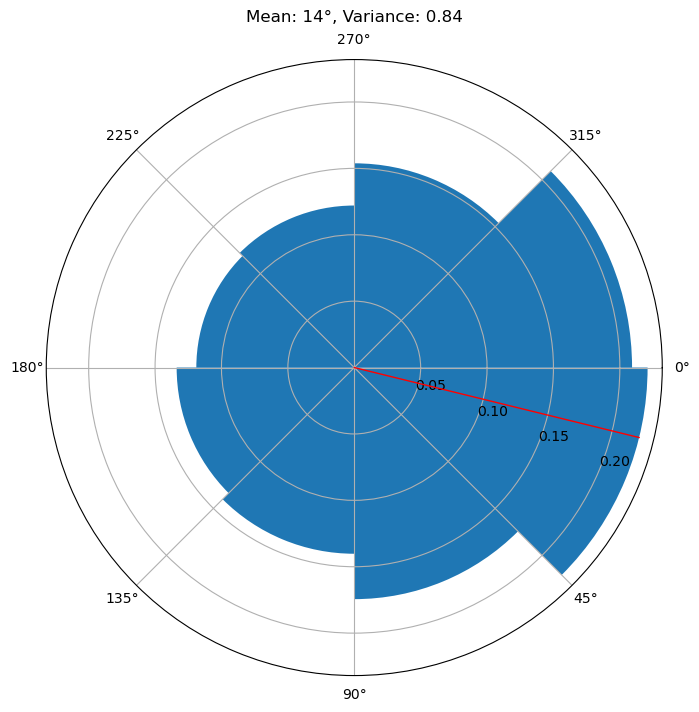

In [6]:
#Distribution of all phase lags and their mean
n_bins = 8

fig, axes = plt.subplots(1, 1, subplot_kw={'polar': True}, figsize=(12, 8))

# Normalize phase lags to be between 0 and 2*pi
phase_lag_normalized = big_df['phase_lag'] % (2 * np.pi)

# Compute the circular mean
circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
circular_var = stats.circvar(phase_lag_normalized, high=2*np.pi, low=0)

# Compute the histogram
counts, bin_edges = np.histogram(phase_lag_normalized, bins=n_bins, range=(0, 2 * np.pi), density=True)

# Convert bin edges to bin centers for polar plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
width = bin_edges[1] - bin_edges[0]  # Calculate the width

# Plot the histogram in the current subplot
ax = axes
ax.bar(bin_centers, counts, width=width, align='center')

# Set title and labels
ax.set_title(f'Mean: {round(circular_mean*180/np.pi)}°, Variance: {"{:.2f}".format(circular_var)}', va='bottom')
ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise

# Plot the median line
ax.plot([circular_mean, circular_mean], [0, max(counts)], color='red', linewidth=1)


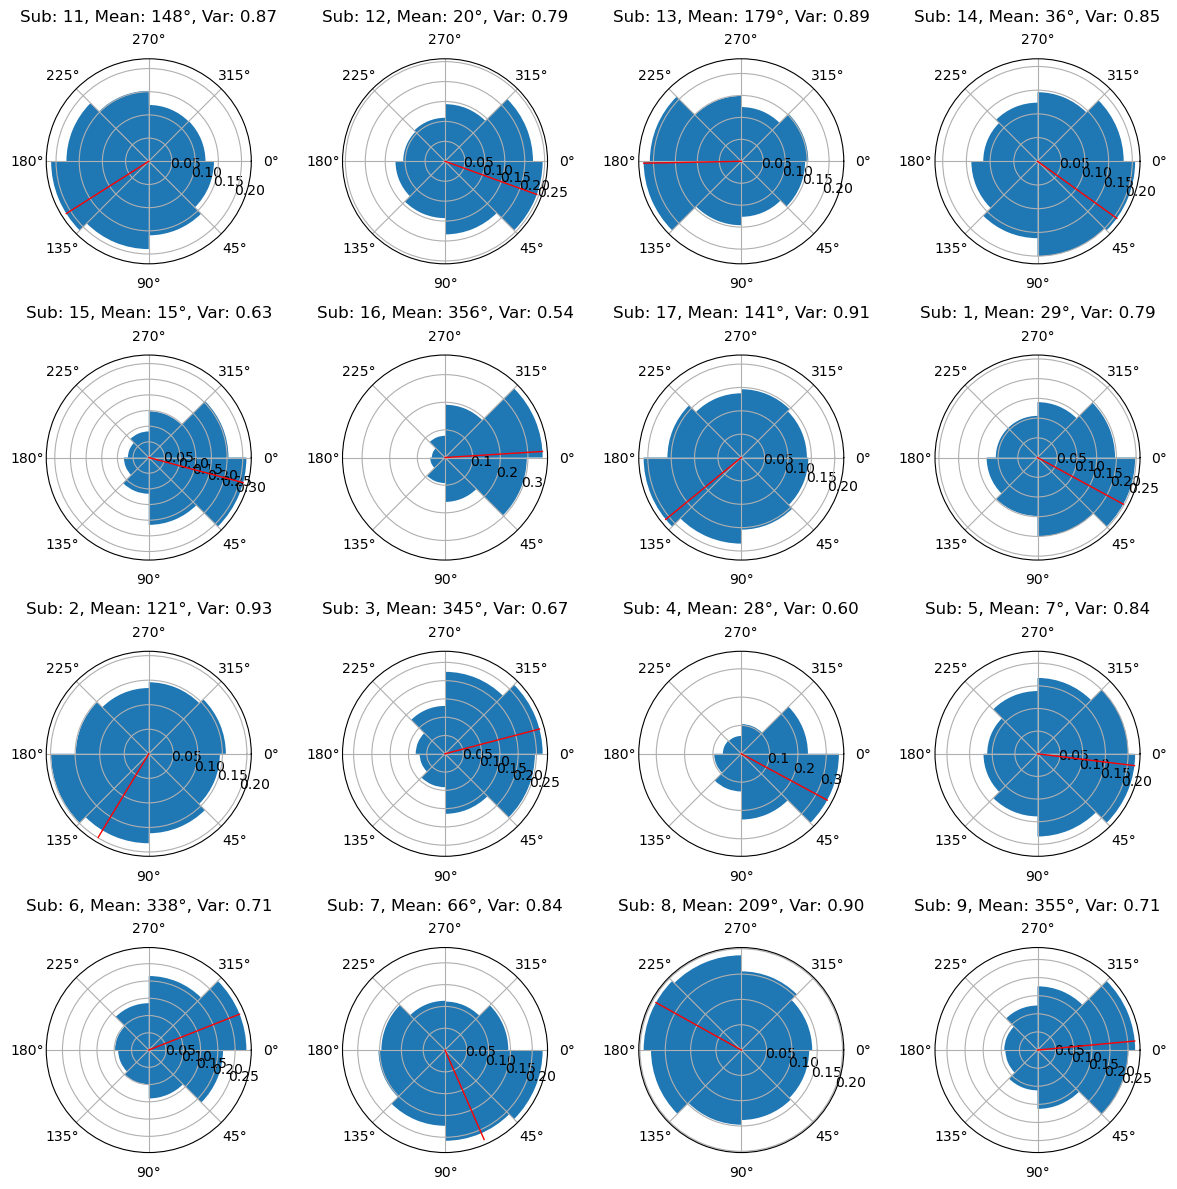

In [7]:
#Distribution of phase lags for each subject and their means
n_bins = 8

# Step 2: Get unique tasks and runs
subjects = big_df['subject'].unique()

# Step 3: Create subplots: rows = tasks, columns = runs
fig, axes = plt.subplots(4, 4, subplot_kw={'polar': True}, figsize=(12, 12))
axes = axes.ravel()

# Step 4: Iterate through each task and run combination
for i, subject in enumerate(subjects):

    # Filter the dataframe for the current task and run
    subject_df = big_df[(big_df['subject'] == subject)]
    
    # Normalize phase lags to be between 0 and 2*pi
    phase_lag_normalized = subject_df['phase_lag'] % (2 * np.pi)
    
    # Compute the circular mean
    circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
    circular_var = stats.circvar(phase_lag_normalized, high=2*np.pi, low=0)
    
    # Compute the histogram
    counts, bin_edges = np.histogram(phase_lag_normalized, bins=n_bins, range=(0, 2 * np.pi), density=True)
    
    # Convert bin edges to bin centers for polar plotting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    width = bin_edges[1] - bin_edges[0]  # Calculate the width

    # Plot the histogram in the current subplot
    ax = axes[i]
    ax.bar(bin_centers, counts, width=width, align='center')

    # Set title and labels
    ax.set_title(f'Sub: {subject}, Mean: {round(circular_mean*180/np.pi)}°, Var: {"{:.2f}".format(circular_var)}', va='bottom')
    ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
    ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise

    # Plot the median line
    ax.plot([circular_mean, circular_mean], [0, max(counts)], color='red', linewidth=1)
    
# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Distribution of subject means and their mean
n_bins = 8
fig, axes = plt.subplots(1, 1, subplot_kw={'polar': True}, figsize=(12, 8))

# Step 2: Get unique tasks and runs
subjects = big_df['subject'].unique()

circular_means = []

# Step 4: Iterate through each task and run combination
for i, subject in enumerate(subjects):
    
    # Filter the dataframe for the current task and run
    subject_df = big_df[(big_df['subject'] == subject)]
    
    # Normalize phase lags to be between 0 and 2*pi
    phase_lag_normalized = subject_df['phase_lag'] % (2 * np.pi)
    
    # Compute the circular mean
    circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
    circular_means.append(circular_mean)

# Normalize phase lags to be between 0 and 2*pi
phase_lag_normalized = big_df['phase_lag'] % (2 * np.pi)

# Compute the circular mean
circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
circular_var = stats.circvar(phase_lag_normalized, high=2*np.pi, low=0)

# Compute the histogram
counts, bin_edges = np.histogram(circular_means, bins=n_bins, range=(0, 2 * np.pi), density=True)

# Convert bin edges to bin centers for polar plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
width = bin_edges[1] - bin_edges[0]  # Calculate the width

# Plot the histogram in the current subplot
ax = axes
ax.bar(bin_centers, counts, width=width, align='center')

# Set title and labels
ax.set_title(f'Mean: {round(circular_mean*180/np.pi)}°', va='bottom')
ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise

# Plot the median line
ax.plot([circular_mean, circular_mean], [0, max(counts)], color='red', linewidth=1)

In [ ]:
#Distribution of phase lag means for each session for each subject and their means
n_bins = 8

# Step 2: Get unique tasks and runs
subjects = big_df['subject'].unique()
tasks = big_df['task'].unique()

# Step 3: Create subplots: rows = tasks, columns = runs
fig, axes = plt.subplots(4, 4, subplot_kw={'polar': True}, figsize=(12, 12))
axes = axes.ravel()

# Step 4: Iterate through each task and run combination
for i, subject in enumerate(subjects):
    
    circular_means = []
    
    
    for j, task in enumerate(tasks):

        # Filter the dataframe for the current task and run
        subject_task_df = big_df[(big_df['subject'] == subject) & (big_df['task'] == task)]
        
        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = subject_task_df['phase_lag'] % (2 * np.pi)
        
        # Compute the circular mean
        circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
        circular_means.append(circular_mean)
    
    # Filter the dataframe for the current task and run
    subject_df = big_df[(big_df['subject'] == subject)]
    
    # Normalize phase lags to be between 0 and 2*pi
    phase_lag_normalized = subject_df['phase_lag'] % (2 * np.pi)
    
    # Compute the circular mean
    circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)

    # Compute the histogram
    counts, bin_edges = np.histogram(circular_means, bins=n_bins, range=(0, 2 * np.pi), density=True)
    
    # Convert bin edges to bin centers for polar plotting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    width = bin_edges[1] - bin_edges[0]  # Calculate the width

    # Plot the histogram in the current subplot
    ax = axes[i]
    ax.bar(bin_centers, counts, width=width, align='center')

    # Set title and labels
    ax.set_title(f'Subject: {subject}, Mean: {round(circular_mean*180/np.pi)}°', va='bottom')
    ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
    ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise

    # Plot the median line
    ax.plot([circular_mean, circular_mean], [0, max(counts)], color='red', linewidth=1)
    
# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Distribution of phase lag means across runs for each task for each subject and their means
# Get unique subject and tasks
subjects = big_df['subject'].unique()
tasks = big_df['task'].unique()

# Create subplots: rows = subjects, columns = tasks
fig, axes = plt.subplots(16, 4, subplot_kw={'polar': True}, figsize=(12, 50))
n_bins = 8

# Iterate through each subject, task and run combination
for i, subject in enumerate(subjects):

    for j, task in enumerate(tasks):
        
        circular_run_means = []
        
        for k, run in enumerate(runs):

            # Filter the dataframe for the current subject, task and run
            subject_task_run_df = big_df[(big_df['subject'] == subject) & (big_df['task'] == task) & (big_df['run'] == run)]
            
            # Normalize phase lags to be between 0 and 2*pi
            phase_lag_normalized = subject_task_run_df['phase_lag'] % (2 * np.pi)
            
            # Compute the circular mean for each run
            circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
            circular_run_means.append(circular_mean)
    
        # Filter the dataframe for the current subject and task
        subject_task_df = big_df[(big_df['subject'] == subject) & (big_df['task'] == task)]
        
        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = subject_task_df['phase_lag'] % (2 * np.pi)
        
        # Compute the circular mean for each task
        circular_task_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)

        # Compute the histogram for each subject and task
        counts, bin_edges = np.histogram(circular_run_means, bins=n_bins, range=(0, 2 * np.pi), density=True)
        
        # Convert bin edges to bin centers for polar plotting
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        width = bin_edges[1] - bin_edges[0]  # Calculate the width

        # Plot the histogram in the current subplot
        ax = axes[i,j]
        ax.bar(bin_centers, counts, width=width, align='center')

        # Set title and labels
        ax.set_title(f'Mean: {round(circular_task_mean*180/np.pi)}°', va='bottom')
        ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
        ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise

        # Plot the mean line
        ax.plot([circular_task_mean, circular_task_mean], [0, max(counts)], color='red', linewidth=1)
    
# Adjust layout
#plt.tight_layout()
plt.show()

In [ ]:
#Distribution of phase lag means across runs for each task for each subject and their means
# Get unique subject and tasks
subjects = big_df['subject'].unique()
tasks = big_df['task'].unique()
runs = big_df['run'].unique()

# Create subplots: rows = subjects, columns = tasks
fig, axes = plt.subplots(4, 4, subplot_kw={'polar': True}, figsize=(12, 12))
axes = axes.ravel()
n_bins = 8

# Colors for different tasks
task_colors = plt.cm.viridis(np.linspace(0, 1, len(tasks)))

# Iterate through each subject, task and run combination
for i, subject in enumerate(subjects):
    ax = axes[i]

    for j, (task, color) in enumerate(zip(tasks, task_colors)):
        
        circular_run_means = []
        
        for k, run in enumerate(runs):

            # Filter the dataframe for the current subject, task and run
            subject_task_run_df = big_df[(big_df['subject'] == subject) & (big_df['task'] == task) & (big_df['run'] == run)]
            
            # Normalize phase lags to be between 0 and 2*pi
            phase_lag_normalized = subject_task_run_df['phase_lag'] % (2 * np.pi)
            
            # Compute the circular mean for each run
            circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
            circular_run_means.append(circular_mean)
    
        # Filter the dataframe for the current subject and task
        subject_task_df = big_df[(big_df['subject'] == subject) & (big_df['task'] == task)]
        
        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = subject_task_df['phase_lag'] % (2 * np.pi)
        
        # Compute the circular mean for each task
        circular_task_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)

        # Compute the histogram for each subject and task
        counts, bin_edges = np.histogram(circular_run_means, bins=n_bins, range=(0, 2 * np.pi), density=True)
        
        # Convert bin edges to bin centers for polar plotting
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        width = bin_edges[1] - bin_edges[0]  # Calculate the width

        # Plot the histogram in the current subject's subplot
        ax.bar(bin_centers, counts, width=width, align='center', color=color, alpha=0.7, label=f'Task {task}')

        # Plot the mean line
        ax.plot([circular_task_mean, circular_task_mean], [0, max(counts)], color=color, linewidth=1.5)

    # Set title and labels
    ax.set_title(f'Subject {subject}', va='bottom', fontsize=10)
    ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
    ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise
    
    # Add a legend
    ax.legend(loc='upper right', fontsize=8)
    
# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
#Distribution of phase lag means across runs for each task for each subject and their means
# Get unique subject and tasks
subjects = big_df['subject'].unique()
tasks = big_df['task'].unique()
runs = big_df['run'].unique()
runs = runs[2:]

# Create subplots: rows = subjects, columns = tasks
fig, axes = plt.subplots(4, 4, subplot_kw={'polar': True}, figsize=(12, 12))
axes = axes.ravel()
n_bins = 8

# Colors for different tasks
task_colors = plt.cm.viridis(np.linspace(0, 1, len(tasks)))

# Iterate through each subject, task and run combination
for i, subject in enumerate(subjects):
    ax = axes[i]

    for j, (task, color) in enumerate(zip(tasks, task_colors)):
        
        circular_run_means = []
        
        for k, run in enumerate(runs):

            # Filter the dataframe for the current subject, task and run
            subject_task_run_df = big_df[(big_df['subject'] == subject) & (big_df['task'] == task) & (big_df['run'] == run)]
            
            # Normalize phase lags to be between 0 and 2*pi
            phase_lag_normalized = subject_task_run_df['phase_lag'] % (2 * np.pi)
            
            # Compute the circular mean for each run
            circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
            circular_run_means.append(circular_mean)
    
        # Filter the dataframe for the current subject and task
        subject_task_df = big_df[(big_df['subject'] == subject) & (big_df['task'] == task)]
        
        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = subject_task_df['phase_lag'] % (2 * np.pi)
        
        # Compute the circular mean for each task
        circular_task_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)

        # Compute the histogram for each subject and task
        counts, bin_edges = np.histogram(circular_run_means, bins=n_bins, range=(0, 2 * np.pi), density=True)
        
        # Convert bin edges to bin centers for polar plotting
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        width = bin_edges[1] - bin_edges[0]  # Calculate the width

        # Plot the histogram in the current subject's subplot
        ax.bar(bin_centers, counts, width=width, align='center', color=color, alpha=0.7, label=f'Task {task}')

        # Plot the mean line
        ax.plot([circular_task_mean, circular_task_mean], [0, max(counts)], color=color, linewidth=1.5)

    # Set title and labels
    ax.set_title(f'Subject {subject}', va='bottom', fontsize=10)
    ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
    ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise
    
    # Add a legend
    ax.legend(loc='upper right', fontsize=8)
    
# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\Maria\AppData\Local\Temp\ipykernel_8400\2906127620.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize=12)


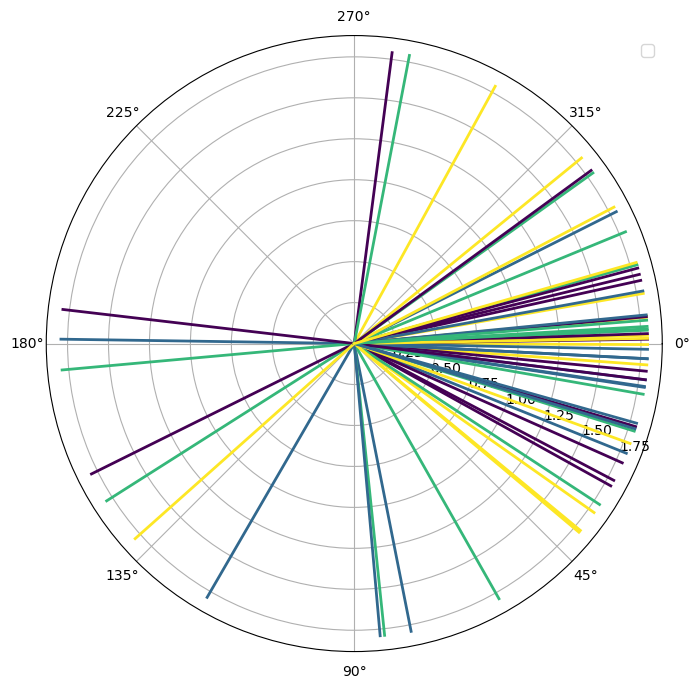

In [56]:
#Distribution of Pre/Post differences of means for each task for each subject
# Get unique subject and tasks
subjects = big_df['subject'].unique()
tasks = big_df['task'].unique()

# Create subplots: rows = subjects, columns = tasks
fig, axes = plt.subplots(1, 1, subplot_kw={'polar': True}, figsize=(8, 8))

# Colors for different tasks
task_colors = plt.cm.viridis(np.linspace(0, 1, len(tasks)))

# Iterate through each subject, task and run combination
for i, subject in enumerate(subjects):
    
    circular_run_means = []

    for j, (task, color) in enumerate(zip(tasks, task_colors)):
        
        
        
        # Filter the dataframe for the current subject, task and run
        subject_task_run_df = big_df[(big_df['subject'] == subject) & (big_df['task'] == task) & (big_df['run'].isin(['1', '2']))]
        
        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = subject_task_run_df['phase_lag'] % (2 * np.pi)
        
        # Compute the circular mean for each run
        circular_mean_Pre = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
        
        # Filter the dataframe for the current subject, task and run
        subject_task_run_df = big_df[(big_df['subject'] == subject) & (big_df['task'] == task) & (big_df['run'].isin(['3', '4', '5']))]
        
        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = subject_task_run_df['phase_lag'] % (2 * np.pi)
        
        # Compute the circular mean for each run
        circular_mean_Post = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
        
        
        circular_mean_diff = (circular_mean_Post - circular_mean_Pre) % (2 * np.pi)
        
        ax = axes
        # Plot the mean line
        ax.plot([circular_mean_diff, circular_mean_diff], [0, max(counts)], color=color, linewidth=2)
        ax.legend(loc='upper right', fontsize=12)
        
        # Set title and labels
        #ax.set_title(f'Mean: {round(circular_task_mean*180/np.pi)}°', va='bottom')
        ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
        ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise
        
        

        
    

# Adjust layout
#plt.tight_layout()
plt.show()

In [40]:
circular_mean_Post

6.265519790154571

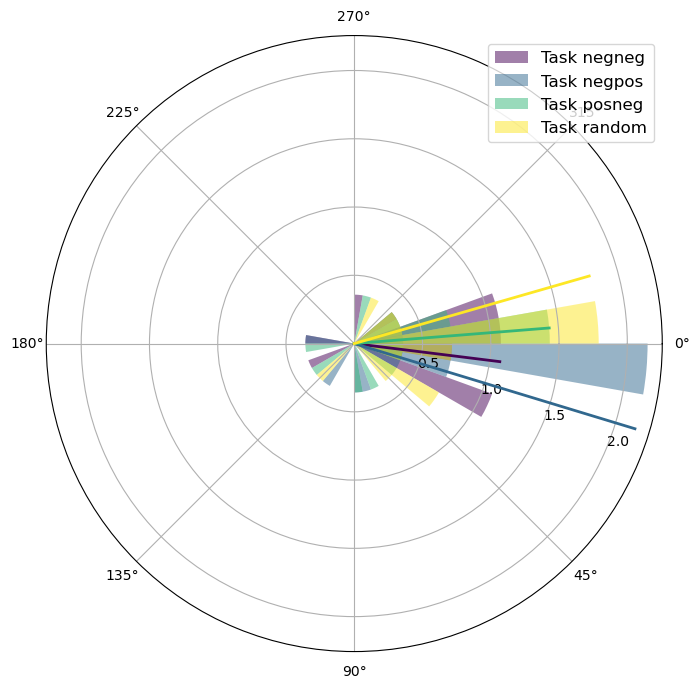

In [53]:
#Distribution of Pre/Post differences of means for each task for each subject
# Get unique subject and tasks
subjects = big_df['subject'].unique()
tasks = big_df['task'].unique()

# Create subplots: rows = subjects, columns = tasks
fig, axes = plt.subplots(1, 1, subplot_kw={'polar': True}, figsize=(8, 8))

# Colors for different tasks
task_colors = plt.cm.viridis(np.linspace(0, 1, len(tasks)))

n_bins = 36

# Iterate through each subject, task and run combination
for j, (task, color) in enumerate(zip(tasks, task_colors)):
    
    circular_task_means = []
    
    for i, subject in enumerate(subjects):
        
        # Filter the dataframe for the current subject, task and run
        subject_task_run_df = big_df[(big_df['subject'] == subject) & (big_df['task'] == task) & (big_df['run'].isin(['1', '2']))]
        
        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = subject_task_run_df['phase_lag'] % (2 * np.pi)
        
        # Compute the circular mean for each run
        circular_mean_Pre = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
        
        # Filter the dataframe for the current subject, task and run
        subject_task_run_df = big_df[(big_df['subject'] == subject) & (big_df['task'] == task) & (big_df['run'].isin(['3', '4', '5']))]
        
        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = subject_task_run_df['phase_lag'] % (2 * np.pi)
        
        # Compute the circular mean for each run
        circular_mean_Post = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
        
        circular_mean_diff = (circular_mean_Post - circular_mean_Pre) % (2 * np.pi)
        
        circular_task_means.append(circular_mean_diff)
        
    # Compute the circular mean for each run
    circular_task_mean = stats.circmean(circular_task_means, high=2*np.pi, low=0)
    
    ax = axes
    
    # Compute the histogram for each subject and task
    counts, bin_edges = np.histogram(circular_task_means, bins=n_bins, range=(0, 2 * np.pi), density=True)
    
    # Convert bin edges to bin centers for polar plotting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    width = bin_edges[1] - bin_edges[0]  # Calculate the width
    
    # Plot the histogram in the current subject's subplot
    ax.bar(bin_centers, counts, width=width, align='center', color=color, alpha=0.5, label=f'Task {task}')
    
    # Plot the mean line
    ax.plot([circular_task_mean, circular_mean_diff], [0, max(counts)], color=color, linewidth=2)
    ax.legend(loc='upper right', fontsize=12)
    
    # Set title and labels
    #ax.set_title(f'Mean: {round(circular_task_mean*180/np.pi)}°', va='bottom')
    ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
    ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise
        
        

        
    

# Adjust layout
#plt.tight_layout()
plt.show()